# Testing Julia and Itensors

#### Simple 1d vector

In [2]:
my_array = [1,2,3,4]
print(my_array)

[1, 2, 3, 4]

In [4]:
typeof(my_array)

Vector{Int64} (alias for Array{Int64, 1})

#### 2d matrices

In [6]:
my_matrix = Array{Int,2}(undef,3,2)
display(my_matrix)

3×2 Matrix{Int64}:
 6573        6573
   -1          -1
    0  5251709728

#### Slicing

In [13]:
my_matrix[:,1] .= 0 #notice that for element-wise operations we need the extra "."
display(my_matrix)

3×2 Matrix{Int64}:
 0        52584
 0           -8
 0  42013677824

In [14]:
my_matrix[:,2] .*=2
display(my_matrix)

3×2 Matrix{Int64}:
 0       105168
 0          -16
 0  84027355648

#### Scalar product

In [17]:
# explicit
a = [1,2,3]

sum(a.*a)

14

In [21]:
# implicit using the LinearAlgebra library
using LinearAlgebra 
dot(a,a)

14

*Aside.* To know where a function/object comes from, use `@which`. The `@` indicates that it is a `macro`, i.e. a function that operates on the code, instead of operating on the variables .

In [22]:
@which dot

LinearAlgebra

In [23]:
@which Array

Core

#### Matrix product

In [34]:
A = [1 2 3;4 5 6]
B = [1 0 0;0 1 0;0 0 -1]

A*B

2×3 Matrix{Int64}:
 1  2  -3
 4  5  -6

## Going for ITensors

In [36]:
using ITensors


In [37]:
let
    # For example:
    i = Index(2,"i")
    j = Index(3,"j")
    T = random_itensor(i,j)
    @show T
end

T = ITensor ord=2
Dim 1: (dim=2|id=724|"i")
Dim 2: (dim=3|id=716|"j")
NDTensors.Dense{Float64, Vector{Float64}}
 2×3
  0.7469664204940403  0.012163622475878325  -0.6839668448785299
 -0.5453448726999787  0.7638911775123087    -1.6440188766979806


ITensor ord=2 (dim=2|id=724|"i") (dim=3|id=716|"j")
NDTensors.Dense{Float64, Vector{Float64}}

## Breakdown of first tutorial: DMRG


### 1 Specifying the problem: provide a Hamiltonian


The tutorial uses the following Hamiltonian

$$ H=\sum_{j=1}^{N-1} \mathbf{S}_j \cdot \mathbf{S}_{j+1}=\sum_{j=1}^{N-1} S_j^z S_{j+1}^z+\frac{1}{2} S_j^{+} S_{j+1}^{-}+\frac{1}{2} S_j^{-} S_{j+1}^{+} $$

In [2]:
using ITensors, ITensorMPS

First we create an `index` object that has the properties of bosons (spins 1, $S=1$). This means that the spin can take values $-1,0,1$ so they are 3-dimensional.

ITensor adds a tag"S=1" that helps with teh construction of the Hamiltonian (I need to check this).

In [4]:
N = 50
sites = siteinds("S=1",N)


50-element Vector{Index{Int64}}:
 (dim=3|id=382|"S=1,Site,n=1")
 (dim=3|id=645|"S=1,Site,n=2")
 (dim=3|id=840|"S=1,Site,n=3")
 (dim=3|id=38|"S=1,Site,n=4")
 (dim=3|id=884|"S=1,Site,n=5")
 (dim=3|id=289|"S=1,Site,n=6")
 (dim=3|id=784|"S=1,Site,n=7")
 (dim=3|id=732|"S=1,Site,n=8")
 (dim=3|id=319|"S=1,Site,n=9")
 (dim=3|id=130|"S=1,Site,n=10")
 ⋮
 (dim=3|id=551|"S=1,Site,n=42")
 (dim=3|id=571|"S=1,Site,n=43")
 (dim=3|id=461|"S=1,Site,n=44")
 (dim=3|id=198|"S=1,Site,n=45")
 (dim=3|id=58|"S=1,Site,n=46")
 (dim=3|id=706|"S=1,Site,n=47")
 (dim=3|id=67|"S=1,Site,n=48")
 (dim=3|id=496|"S=1,Site,n=49")
 (dim=3|id=946|"S=1,Site,n=50")

The Hamiltonian is defined from a **sum of operators**

In [5]:
os = OpSum()

sum(

)

it is built via **accumulation** to express the sums above

In [6]:
for j=1:N-1
    os += "Sz",j,"Sz",j+1 
    os += 1/2,"S+",j,"S-",j+1
    os += 1/2,"S+",j,"S-",j+1
end

The Hamiltonian proper is a **Matrix Product Operator** on the sites

In [7]:
H = MPO(os,sites)

MPO
[1] ((dim=4|id=8|"Link,l=1"), (dim=3|id=382|"S=1,Site,n=1")', (dim=3|id=382|"S=1,Site,n=1"))
[2] ((dim=4|id=8|"Link,l=1"), (dim=4|id=362|"Link,l=2"), (dim=3|id=645|"S=1,Site,n=2")', (dim=3|id=645|"S=1,Site,n=2"))
[3] ((dim=4|id=362|"Link,l=2"), (dim=4|id=389|"Link,l=3"), (dim=3|id=840|"S=1,Site,n=3")', (dim=3|id=840|"S=1,Site,n=3"))
[4] ((dim=4|id=389|"Link,l=3"), (dim=4|id=310|"Link,l=4"), (dim=3|id=38|"S=1,Site,n=4")', (dim=3|id=38|"S=1,Site,n=4"))
[5] ((dim=4|id=310|"Link,l=4"), (dim=4|id=730|"Link,l=5"), (dim=3|id=884|"S=1,Site,n=5")', (dim=3|id=884|"S=1,Site,n=5"))
[6] ((dim=4|id=730|"Link,l=5"), (dim=4|id=137|"Link,l=6"), (dim=3|id=289|"S=1,Site,n=6")', (dim=3|id=289|"S=1,Site,n=6"))
[7] ((dim=4|id=137|"Link,l=6"), (dim=4|id=347|"Link,l=7"), (dim=3|id=784|"S=1,Site,n=7")', (dim=3|id=784|"S=1,Site,n=7"))
[8] ((dim=4|id=347|"Link,l=7"), (dim=4|id=390|"Link,l=8"), (dim=3|id=732|"S=1,Site,n=8")', (dim=3|id=732|"S=1,Site,n=8"))
[9] ((dim=4|id=390|"Link,l=8"), (dim=4|id=459|"Link,l

The initial state of the system can be a random **Matrix Product State** on the sites. 

Apparently it is **unbiased**, whatever that truly means. A bond-dimension needs to be specified, and this corresponds to the number of states kept in a DMRG calculation. So, naively, the higher the bond dimension, the more accurate the representation of the state space, and the more accurate is the final calculation. It is not clear to me that a systematic knowledge of the error exists or whether it is Hamiltonian-specific.

In [8]:
psi0 = random_mps(sites;linkdims=10);

We now perform a number of iterations of the DMRG algorithm. At every iteration, the bond dimension will increase, se we need to set bounds on the maximal bond dimension.

In [9]:
nsweeps = 5
maxdim = [10,20,100,100,200]
cutoff = [1E-10]

1-element Vector{Float64}:
 1.0e-10

We run  the dmrg explicitely

In [56]:
energy,psi = dmrg(H,psi0;nsweeps,maxdim,cutoff)

After sweep 1 energy=-110.38148966367507  maxlinkdim=10 maxerr=2.88E-02 time=8.587
After sweep 2 energy=-130.0185137592874  maxlinkdim=20 maxerr=2.89E-05 time=0.165
After sweep 3 energy=-136.35679163958602  maxlinkdim=100 maxerr=1.37E-10 time=3.365
After sweep 4 energy=-145.36061054737175  maxlinkdim=100 maxerr=7.54E-08 time=9.361
After sweep 5 energy=-159.63506587769282  maxlinkdim=200 maxerr=2.50E-10 time=20.081


(-159.63506587769282, MPS
[1] ((dim=3|id=872|"Link,l=1"), (dim=3|id=453|"S=1,Site,n=1"))
[2] ((dim=8|id=897|"Link,l=2"), (dim=3|id=343|"S=1,Site,n=2"), (dim=3|id=872|"Link,l=1"))
[3] ((dim=3|id=526|"S=1,Site,n=3"), (dim=22|id=639|"Link,l=3"), (dim=8|id=897|"Link,l=2"))
[4] ((dim=3|id=437|"S=1,Site,n=4"), (dim=59|id=365|"Link,l=4"), (dim=22|id=639|"Link,l=3"))
[5] ((dim=3|id=685|"S=1,Site,n=5"), (dim=123|id=455|"Link,l=5"), (dim=59|id=365|"Link,l=4"))
[6] ((dim=3|id=603|"S=1,Site,n=6"), (dim=194|id=906|"Link,l=6"), (dim=123|id=455|"Link,l=5"))
[7] ((dim=3|id=986|"S=1,Site,n=7"), (dim=200|id=961|"Link,l=7"), (dim=194|id=906|"Link,l=6"))
[8] ((dim=3|id=568|"S=1,Site,n=8"), (dim=200|id=910|"Link,l=8"), (dim=200|id=961|"Link,l=7"))
[9] ((dim=3|id=406|"S=1,Site,n=9"), (dim=200|id=87|"Link,l=9"), (dim=200|id=910|"Link,l=8"))
[10] ((dim=3|id=116|"S=1,Site,n=10"), (dim=200|id=870|"Link,l=10"), (dim=200|id=87|"Link,l=9"))
[11] ((dim=3|id=977|"S=1,Site,n=11"), (dim=200|id=418|"Link,l=11"), (dim=2

In [57]:
energy

-159.63506587769282

I should be able also to track the history of the system. A for loop shoudl do this explicitely.

In [13]:
energies = []
ns = 1
md = 200
p = psi0

for sweep=1:5
    energy,p = dmrg(H,p;nsweeps=ns,maxdim=10+2^sweep,cutoff=cutoff)
    push!(energies,energy)
end


After sweep 1 energy=-53.54857139433463  maxlinkdim=12 maxerr=1.72E-02 time=11.623
After sweep 1 energy=-73.54232153727993  maxlinkdim=14 maxerr=9.66E-05 time=0.069
After sweep 1 energy=-81.7928344786385  maxlinkdim=18 maxerr=1.05E-05 time=0.204
After sweep 1 energy=-83.74519300852722  maxlinkdim=26 maxerr=9.14E-07 time=0.157
After sweep 1 energy=-80.76915985383505  maxlinkdim=42 maxerr=2.17E-07 time=0.850


In [12]:
print(2^5)

32

In [31]:
using GLMakie
theme = include("theme.jl")
theme isa Attributes && set_theme!(theme)

Attributes with 1 entry:
  Axis => Attributes with 2 entries:
    xgridvisible => false
    ygridvisible => false

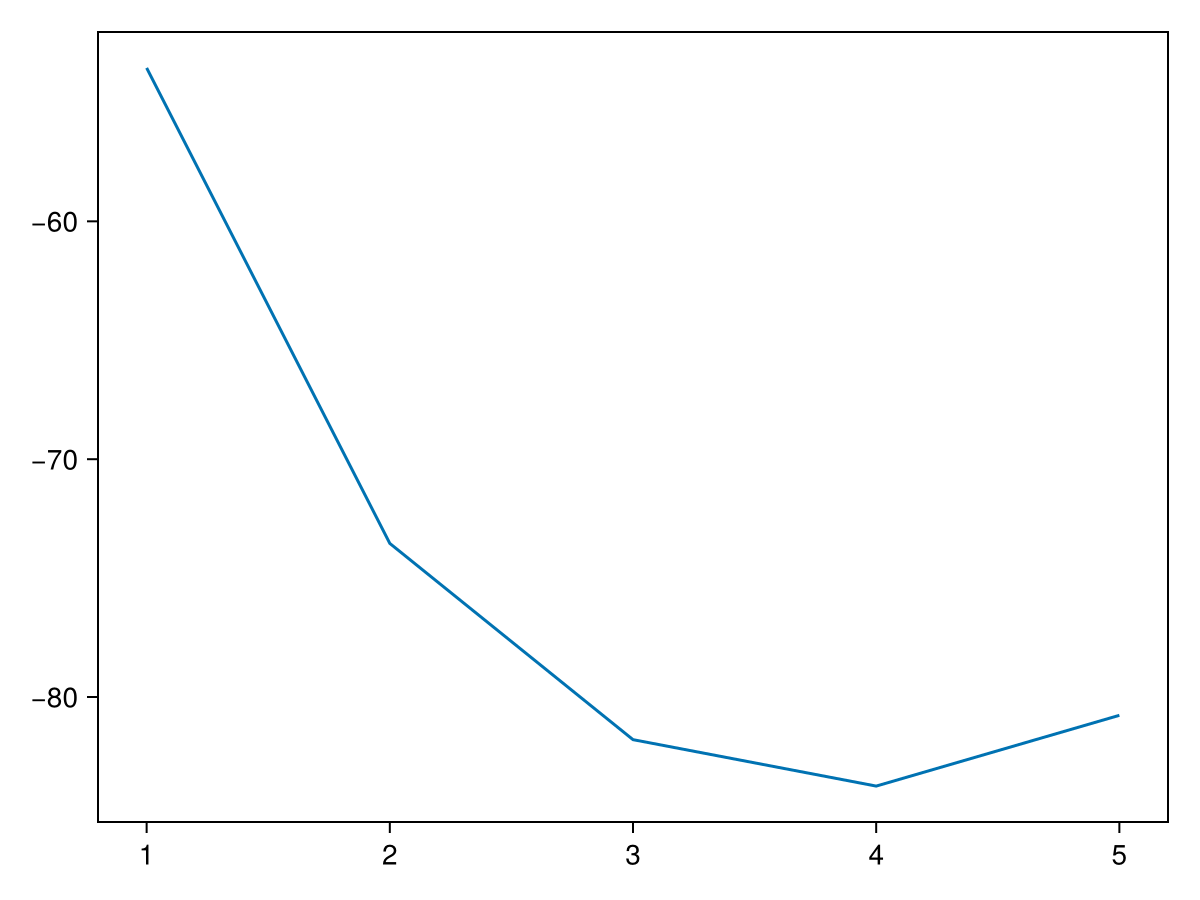

In [30]:
with_theme(custom_theme) do 
    lines(energies)
end